In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pingouin as pg
from scipy.stats import ttest_ind

def plot_2histograms(x, y, bins=7):
    plt.figure(figsize=(8, 6))
    plt.hist([x, y], bins=bins, label= ["1", "2"])
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend(loc='upper right')
    plt.show()
    
def ttest(controle, tratamento):
    stat, p = stats.ttest_ind(controle, tratamento)
    print('t=%.3f, p=%.5f' % (stat, p))
    if p <= 0.0001:
        return "****"
    elif p <= 0.001:
        return "***"
    elif p <= 0.01:
        return "**"
    elif p <= 0.05:
        return "*"
    return "NS"

In [1]:

def teste_normalidade(x):
    # Plotting the histogram with KDE line
    plt.subplot(1, 2, 1)
    plt.rcParams["figure.figsize"] = (8, 4)
    ax = sns.histplot(x, kde=True)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_linewidth(0.5)
    ax.spines['bottom'].set_color('gray')
    ax.tick_params(axis='x', width=0.5, color='gray')
    ax.tick_params(axis='y', width=0.5, color='gray')

    # Plotting the QQ-plot
    plt.subplot(1, 2, 2)
    pg.qqplot(x, dist='norm')
    
    # Calculating skewness and kurtosis
    print('Sample size:', len(x))
    print('Skewness:', stats.skew(x), '(The farther from zero, the less normal)')
    print('Kurtosis:', stats.kurtosis(x))

    # Shapiro-Wilk test (may not work well with many identical values)
    W, p = stats.shapiro(x)
    print('Shapiro-Wilk: W={0}, p={1}'.format(W, p), '(if p > 0.05, it is normal)')

    # Kolmogorov-Smirnov test
    D, p = stats.kstest(x, cdf='norm', args=(x.mean(), x.std()), N=len(x))
    print('Kolmogorov-Smirnov: D={0}, p={1}'.format(D, p), '(if p > 0.05, it is normal)')

    # Anderson-Darling test
    ad_stat, ad_critical, ad_theoretical = stats.anderson(x, dist='norm')
    print('Anderson-Darling: T={0}, p(0.05)={1}'.format(ad_stat, ad_critical[2]), '(if p > 0.05, it is normal)')
    print('Anderson-Darling critical values:', ad_critical)
    print('Anderson-Darling percentages:', ad_theoretical)

In [3]:
df1 = pd.read_csv('data/1_slice/fakdnapk.tsv', sep='\t')
df2 = pd.read_csv('data/1_slice/fakgh2ax.tsv', sep='\t')
df3 = pd.read_csv('data/1_slice/gh2axdnapk.tsv', sep='\t')


In [4]:
df1 = df1[['Image A', 'Image B', "ROI", "Pearson's Coefficient"]]
df1['pc_fak_dnapk'] = df1["Pearson's Coefficient"]
df1 = df1.drop(columns=["Pearson's Coefficient"])

In [5]:
df2 = df2[['Image A', 'Image B', "ROI", "Pearson's Coefficient"]]
df2['pc_fak_gh2ax'] = df2["Pearson's Coefficient"]
df2 = df2.drop(columns=["Pearson's Coefficient"])

In [6]:
df3 = df3[['Image A', 'Image B', "ROI", "Pearson's Coefficient"]]
df3['pc_dnapk_gh2ax'] = df3["Pearson's Coefficient"]
df3 = df3.drop(columns=["Pearson's Coefficient"])

In [7]:
df1['pc_fak_gh2ax'] = df2['pc_fak_gh2ax']
df1['pc_dnapk_gh2ax'] = df3['pc_dnapk_gh2ax']

In [8]:
df = df1.copy()
df = df.drop(columns=['Image B'])
df["Image A"] = df["Image A"].str.strip('C3-')
column_rename = {'Image A': "Image"}
df = df.rename(columns=column_rename)

In [9]:
df

,Image,ROI,pc_fak_dnapk,pc_fak_gh2ax,pc_dnapk_gh2ax
0,d1-doxo-dapi-405-fak-488-dnapk-546-h2ax-647_01...,nucleus,-0.043,0.247,-0.031
1,d1-doxo-dapi-405-fak-488-dnapk-546-h2ax-647_01...,combine,-0.191,0.206,-0.042
2,d1-doxo-dapi-405-fak-488-dnapk-546-h2ax-647_01...,nucleus without clusters,0.003,0.233,-0.019
3,d1-doxo-dapi-405-fak-488-dnapk-546-h2ax-647_01...,nucleus,0.024,0.375,-0.010
4,d1-doxo-dapi-405-fak-488-dnapk-546-h2ax-647_01...,combine,-0.184,0.451,-0.211
...,...,...,...,...,...
73,d2-dox-h2ax-647-dnapk-564-fak-488-dapi-08_Out_...,combine,-0.240,0.069,-0.155
74,d2-dox-h2ax-647-dnapk-564-fak-488-dapi-08_Out_...,nucleus without clusters,-0.133,0.128,-0.088
75,d2-dox-h2ax-647-dnapk-564-fak-488-dapi-16_Out_...,nucleus,-0.076,0.035,-0.071
76,d2-dox-h2ax-647-dnapk-564-fak-488-dapi-16_Out_...,combine,-0.070,0.059,-0.105


,count,mean,std,min,25%,50%,75%,max
ROI,,,,,,,,
combine,26.0,-0.170387,0.090971,-0.391,-0.23225,-0.1425,-0.11875,0.000931
nucleus,26.0,-0.088154,0.047072,-0.171,-0.11550,-0.0895,-0.06150,0.024000
nucleus without clusters,26.0,-0.036059,0.045625,-0.133,-0.05675,-0.0345,-0.01125,0.079000


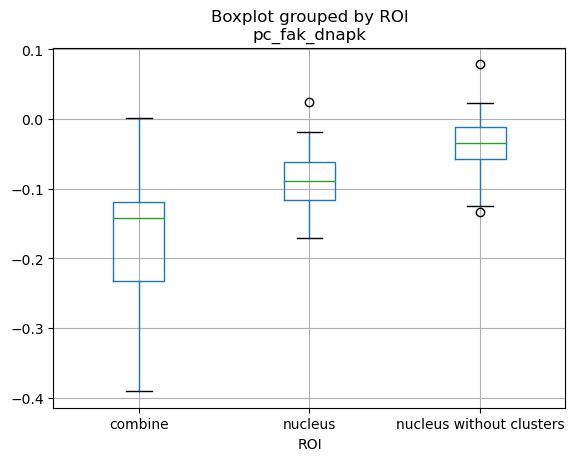

In [10]:
# correlação fak e dnapk

df.boxplot(column="pc_fak_dnapk", by='ROI')
df.groupby('ROI')["pc_fak_dnapk"].describe()

<img src="http://localhost:8888/files/coloc%20fak%20cluster/imagens/d1-doxo_02_nucleo_0_fakdnapk.jpg?_xsrf=2%7C78653a56%7C92a21b56986685715aef91b62e35b6b5%7C1689008711" alt="drawing" width="400"/>
d1-doxo_02_nucleo_0_dnapkgh2ax




,count,mean,std,min,25%,50%,75%,max
ROI,,,,,,,,
combine,26.0,-0.096038,0.077544,-0.270,-0.14550,-0.0935,-0.0610,0.096
nucleus,26.0,-0.051038,0.040337,-0.140,-0.07075,-0.0510,-0.0320,0.075
nucleus without clusters,26.0,-0.021346,0.036487,-0.088,-0.04350,-0.0275,-0.0095,0.080


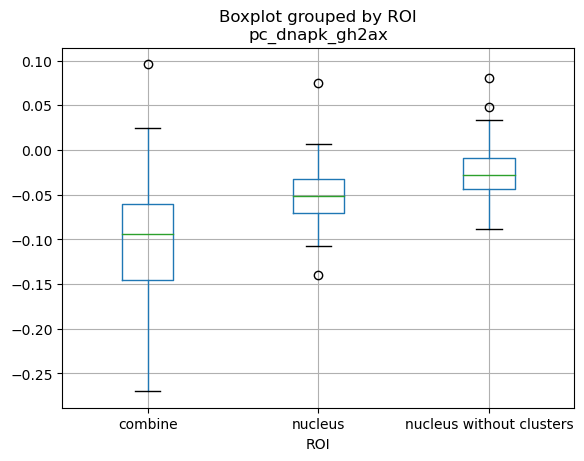

In [11]:
# correlação dnapk e gh2ax
df.boxplot(column="pc_dnapk_gh2ax", by='ROI')
df.groupby('ROI')["pc_dnapk_gh2ax"].describe()

<img src="http://localhost:8888/files/coloc%20fak%20cluster/imagens/d1-doxo_02_nucleo_0_dnapkgh2ax.jpg?_xsrf=2%7C78653a56%7C92a21b56986685715aef91b62e35b6b5%7C1689008711" alt="drawing" width="400"/>
d1-doxo_02_nucleo_0_dnapkgh2ax



,count,mean,std,min,25%,50%,75%,max
ROI,,,,,,,,
combine,26.0,0.222500,0.152610,0.010,0.10400,0.1585,0.36525,0.463
nucleus,26.0,0.223885,0.127955,0.035,0.11775,0.1990,0.34325,0.457
nucleus without clusters,26.0,0.157192,0.083172,0.029,0.09250,0.1540,0.22175,0.340


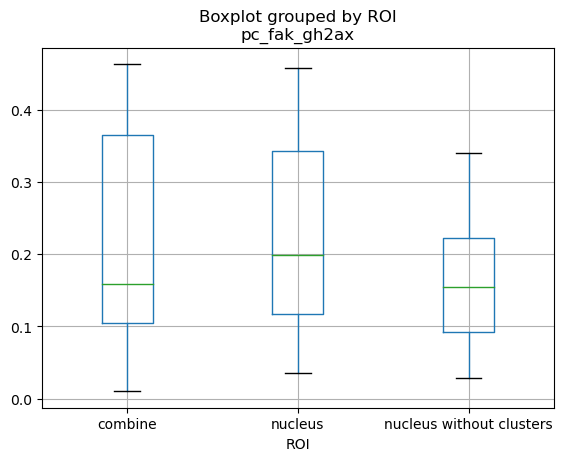

In [12]:
# correlação fak e gh2ax
df.boxplot(column="pc_fak_gh2ax", by='ROI')
df.groupby('ROI')["pc_fak_gh2ax"].describe()

<img src="http://localhost:8888/files/coloc%20fak%20cluster/imagens/d1-doxo_02_nucleo_0_fakgh2ax.jpg?_xsrf=2%7C78653a56%7C92a21b56986685715aef91b62e35b6b5%7C1689008711" alt="drawing" width="400"/>
d1-doxo_02_nucleo_0_dnapkgh2ax



In [13]:
# dnapk - FAK
pc_fak_dnapk_combine = df[df['ROI']== 'combine']['pc_fak_dnapk']
pc_fak_dnapk_nucleus = df[df['ROI']== 'nucleus']['pc_fak_dnapk']
pc_fak_dnapk_nucleus_nocluster = df[df['ROI']== 'nucleus without clusters']['pc_fak_dnapk']

# FAK - gh2ax
pc_fak_gh2ax_combine = df[df['ROI']== 'combine']['pc_fak_gh2ax']
pc_fak_gh2ax_nucleus = df[df['ROI']== 'nucleus']['pc_fak_gh2ax']
pc_fak_gh2ax_nucleus_nocluster = df[df['ROI']== 'nucleus without clusters']['pc_fak_gh2ax']

# dnapk - gh2ax
pc_dnapk_gh2ax_combine = df[df['ROI']== 'combine']['pc_dnapk_gh2ax']
pc_dnapk_gh2ax_nucleus = df[df['ROI']== 'nucleus']['pc_dnapk_gh2ax']
pc_dnapk_gh2ax_nucleus_nocluster = df[df['ROI']== 'nucleus without clusters']['pc_dnapk_gh2ax']

In [14]:
df_combine = df[df['ROI']=='combine']
df_combine.head()

,Image,ROI,pc_fak_dnapk,pc_fak_gh2ax,pc_dnapk_gh2ax
1,d1-doxo-dapi-405-fak-488-dnapk-546-h2ax-647_01...,combine,-0.191,0.206,-0.042
4,d1-doxo-dapi-405-fak-488-dnapk-546-h2ax-647_01...,combine,-0.184,0.451,-0.211
7,d1-doxo-dapi-405-fak-488-dnapk-546-h2ax-647_02...,combine,-0.387,0.461,-0.270
10,d1-doxo-dapi-405-fak-488-dnapk-546-h2ax-647_03...,combine,-0.249,0.458,-0.154
13,d1-doxo-dapi-405-fak-488-dnapk-546-h2ax-647_03...,combine,-0.118,0.382,-0.122


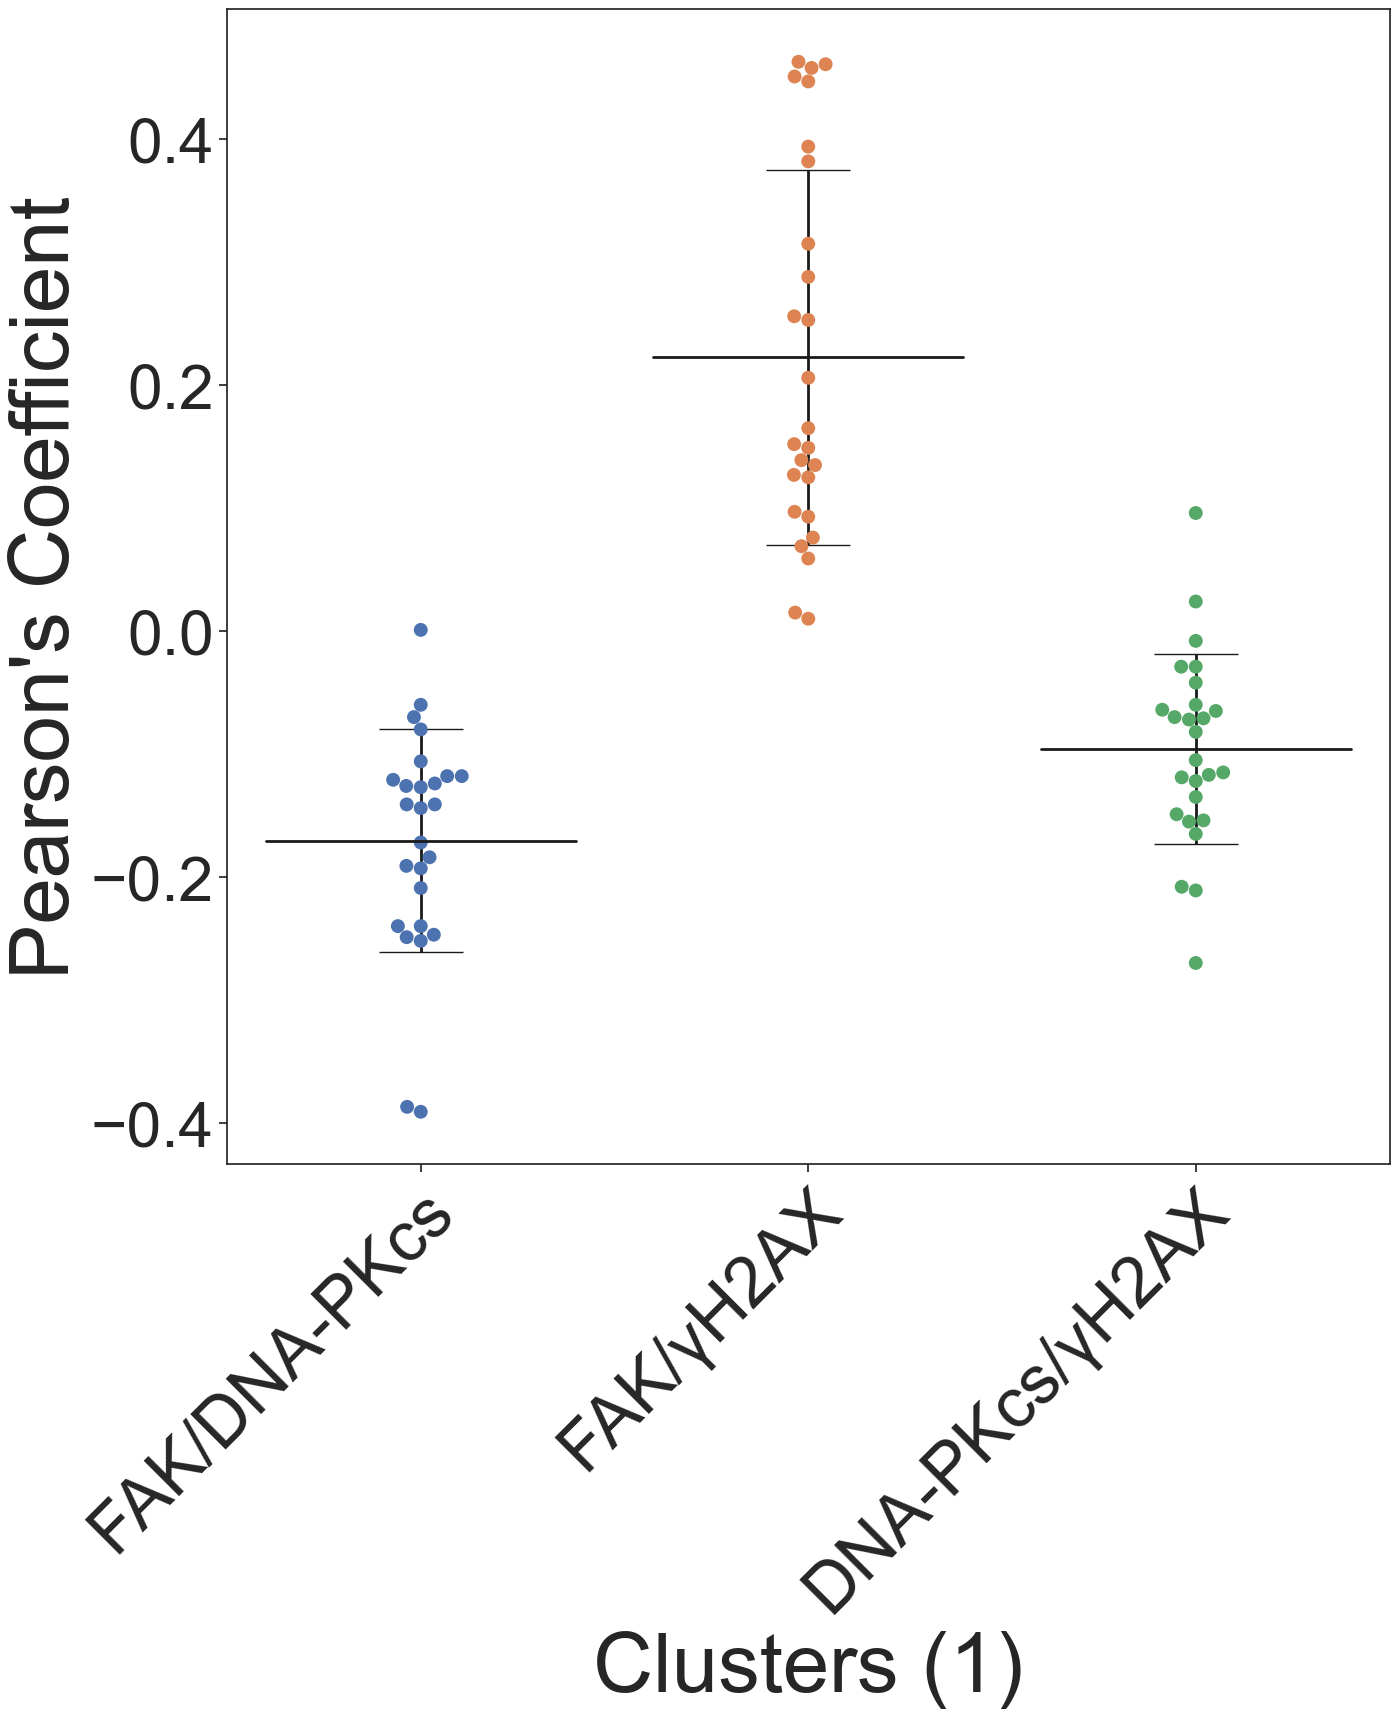

In [21]:

nome_figura = 'swarmplot_fakcluster_pc_3channel_enlarge03_higherthan03'
ylabel = "Pearson's Coefficient"
xlabels = ['FAK/DNA-PKcs', 'FAK/γH2AX', 'DNA-PKcs/γH2AX']
label_eixo_x = 'Clusters (1)'
tamanho_label = 60
other_label = 40

sns.set(rc={"figure.figsize":(15, 15)}) # width=20, height=20
sns.set_style("ticks")

ax = sns.swarmplot(data=df_combine,size=10)

sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            data=df_combine,
            showfliers=False,
            showbox=False,
            showcaps=False, 
            ax=ax)

means1 = [pc_fak_dnapk_combine.mean(), pc_fak_gh2ax_combine.mean(), pc_dnapk_gh2ax_combine.mean()]
stds1 = [pc_fak_dnapk_combine.std(), pc_fak_gh2ax_combine.std(), pc_dnapk_gh2ax_combine.std()]
x = [0,1,2]

plt.errorbar(x, means1, stds1, fmt=' ', capsize= 30, linewidth= 2, color="k")

ax.tick_params(axis='y', which='major', labelsize=tamanho_label-15)
ax.set_xticklabels(xlabels, fontsize=tamanho_label-10, rotation=45, ha='right', rotation_mode='anchor')
ax.set_ylabel(ylabel, fontsize=tamanho_label)
plt.xlabel(label_eixo_x, fontsize = tamanho_label)

plt.savefig(nome_figura + ".pdf", bbox_inches='tight') #salvar em .pdf pra sempre ter uma resolução infinita
plt.savefig(nome_figura + ".jpeg", bbox_inches='tight')
plt.show()

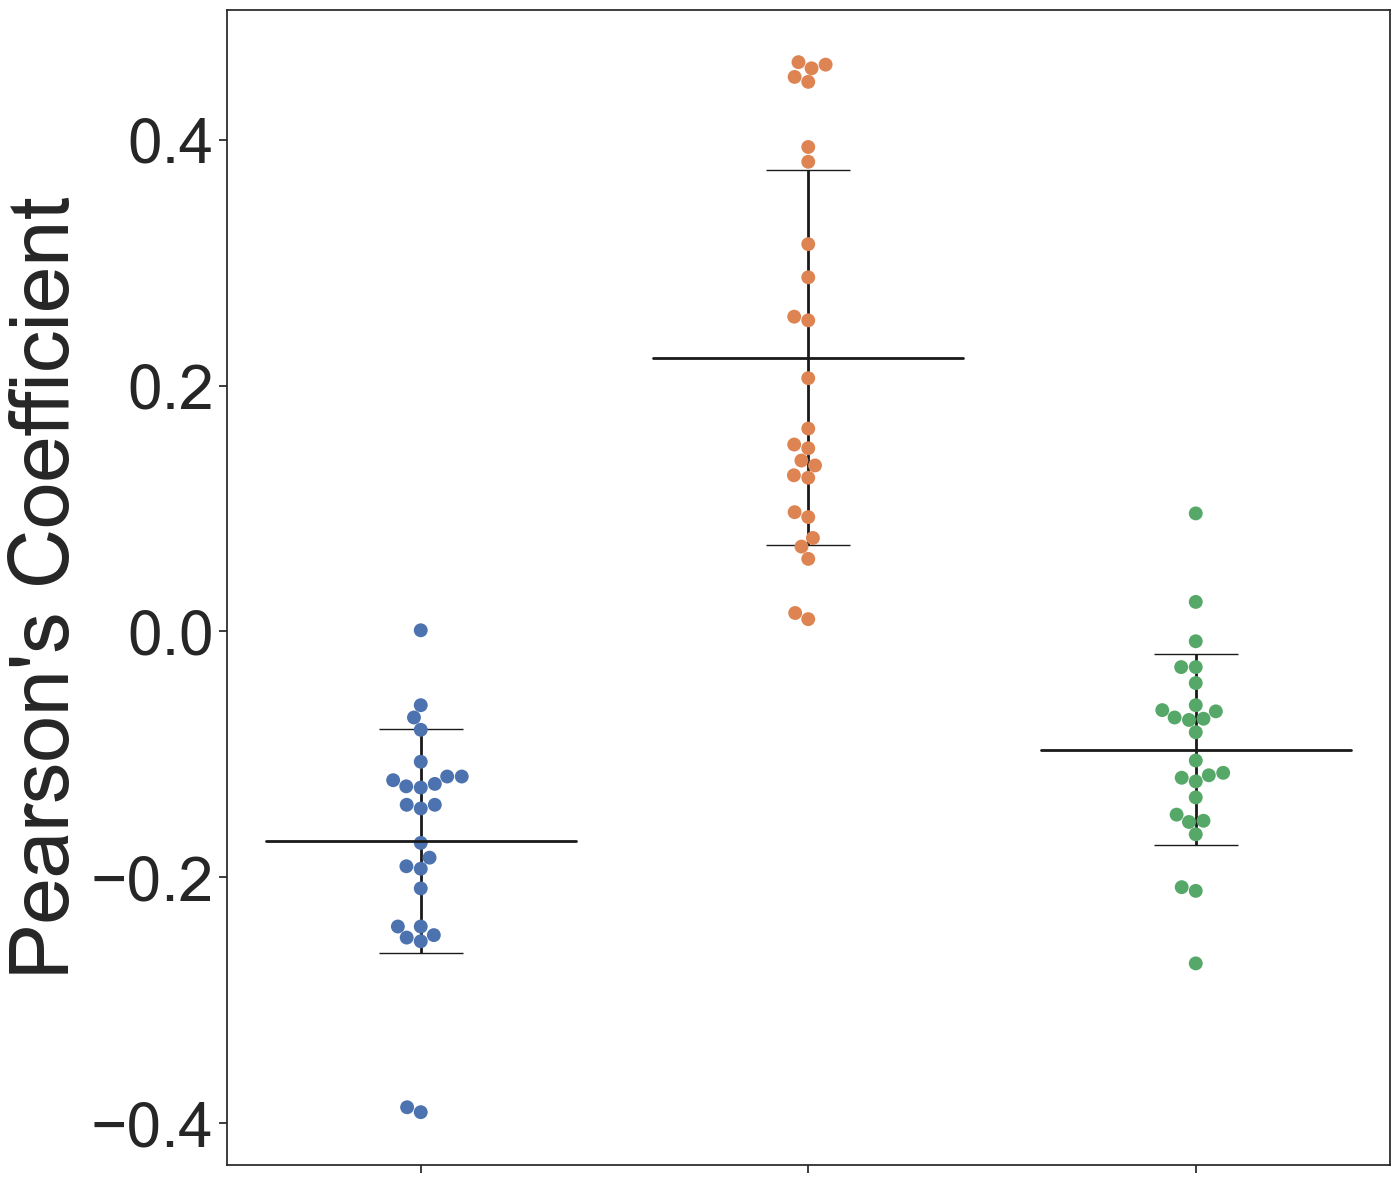

In [19]:

nome_figura = 'swarmplot_fakcluster_pc_3channel_enlarge03_higherthan03_semnome'
ylabel = "Pearson's Coefficient"
xlabels = ['', '', '']
label_eixo_x = ''
tamanho_label = 60
other_label = 40

sns.set(rc={"figure.figsize":(15, 15)}) # width=20, height=20
sns.set_style("ticks")

ax = sns.swarmplot(data=df_combine,size=10)

sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            data=df_combine,
            showfliers=False,
            showbox=False,
            showcaps=False, 
            ax=ax)

means1 = [pc_fak_dnapk_combine.mean(), pc_fak_gh2ax_combine.mean(), pc_dnapk_gh2ax_combine.mean()]
stds1 = [pc_fak_dnapk_combine.std(), pc_fak_gh2ax_combine.std(), pc_dnapk_gh2ax_combine.std()]
x = [0,1,2]

plt.errorbar(x, means1, stds1, fmt=' ', capsize= 30, linewidth= 2, color="k")

ax.tick_params(axis='y', which='major', labelsize=tamanho_label-15)
ax.set_xticklabels(xlabels, fontsize=tamanho_label-10, rotation=45, ha='right', rotation_mode='anchor')
ax.set_ylabel(ylabel, fontsize=tamanho_label)
plt.xlabel(label_eixo_x, fontsize = tamanho_label)

plt.savefig(nome_figura + ".pdf", bbox_inches='tight') #salvar em .pdf pra sempre ter uma resolução infinita
plt.savefig(nome_figura + ".jpeg", bbox_inches='tight')
plt.show()